<a href="https://colab.research.google.com/github/giannismantzaris-cmd/DAMA61/blob/main/Mantzaris_WA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
# Load dataset as a dataframe from the sklearn.datasets subpackage
california = fetch_california_housing(as_frame=True)
df = california.frame

In [3]:
#inspect a few initial values
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# compute descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [8]:
#report df shape
df.shape

(20640, 9)

In [6]:
#check number of missing values per column
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [5]:
#report data types
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


There are no missing or categorical values in this dataset

In [6]:
#Use the MedHouseVal (median house value) as the target value and the rest of the columns of the
#dataframe as the input features.
target = "MedHouseVal"
predictors = [col for col in df.columns if col != target]

print("Target variable:", target)
print("Predictor variables:", predictors)

Target variable: MedHouseVal
Predictor variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
#Split the data into training (70%) and testing (30%) sets.
from sklearn.model_selection import train_test_split

X = df[predictors]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [8]:
#Apply feature scaling to standardize input variables, mean
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

We apply transformation to scale the data both on train and test set. This ensures both sets are on the same scale. But we fot the scaler only in the train set, to avoid data leackage - we act like we dont know the test set exists

In [9]:
#Train a simple Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
#make predictions
y_pred = lin_reg.predict(X_test_scaled)

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

In [13]:
mse

0.5305677824766752

In [14]:
rmse

np.float64(0.7284008391515452)

In [15]:
r2

0.5957702326061664

The Linear Regression model achieves an RMSE of 0.73, meaning the
average prediction error is about $73000.
The R2 score of 0.60 means that the model explains around 60% of the variability in median house values.

This performance is expected, as this is a simple linear model, but house prices contain also non-linear relations that the model cannot fully capture.

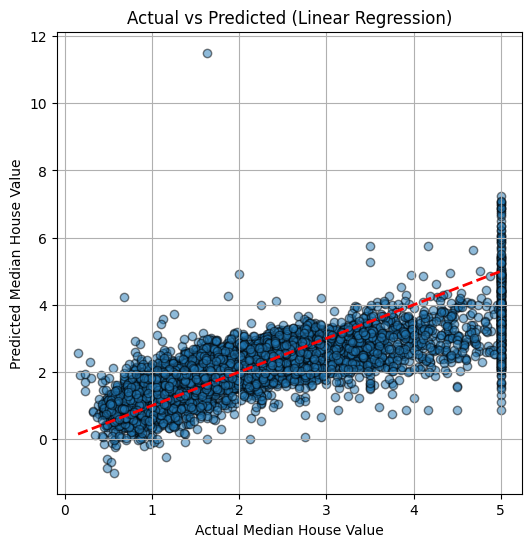

In [16]:
#plot the ground truth median house values against the predicted ones
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.show()

asda

In [17]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
# Pipeline: StandardScaler -> Ridge
ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge",  Ridge())
])

In [19]:
# Values of alpha to test
ridge_param_grid = {
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10]
}

In [20]:
# 5-fold cross-validation grid search

from sklearn.model_selection import GridSearchCV

ridge_grid = GridSearchCV(
    ridge_pipeline,
    ridge_param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [21]:
ridge_grid.best_params_

{'ridge__alpha': 0.001}

In [22]:
best_ridge = ridge_grid.best_estimator_

In [23]:
y_pred_ridge = best_ridge.predict(X_test)

In [24]:
mse_ridge  = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge   = r2_score(y_test, y_pred_ridge)

In [25]:
mse_ridge

0.5305677582888796

In [26]:
rmse_ridge

np.float64(0.7284008225481898)

In [27]:
r2_ridge

0.5957702510344

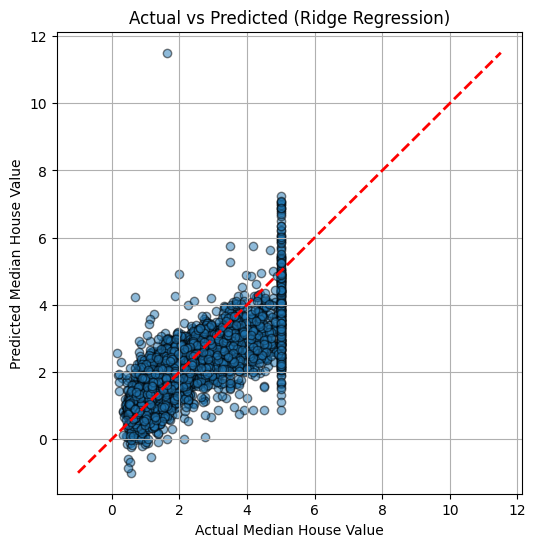

In [28]:
#plot the ground truth median house values against the predicted ones

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, edgecolors="k")
min_val = min(y_test.min(), y_pred_ridge.min())
max_val = max(y_test.max(), y_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Ridge Regression)")
plt.grid(True)
plt.show()

In [29]:
# Pipeline: StandardScaler -> Lasso
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso",  Lasso(max_iter=10000))
])

In [30]:
lasso_param_grid = {
    "lasso__alpha": [0.001, 0.01, 0.1, 1, 10]
}

In [31]:
lasso_grid = GridSearchCV(
    lasso_pipeline,
    lasso_param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

In [32]:
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [33]:
lasso_grid.best_params_

{'lasso__alpha': 0.001}

In [34]:
best_lasso = lasso_grid.best_estimator_

In [35]:
#Αξιολόγηση Lasso στο test set
y_pred_lasso = best_lasso.predict(X_test)

In [36]:
mse_lasso  = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso   = r2_score(y_test, y_pred_lasso)

In [37]:
mse_lasso

0.5297443668521692

In [38]:
rmse_lasso

np.float64(0.7278353981857225)

In [39]:
r2_lasso

0.5963975777208825

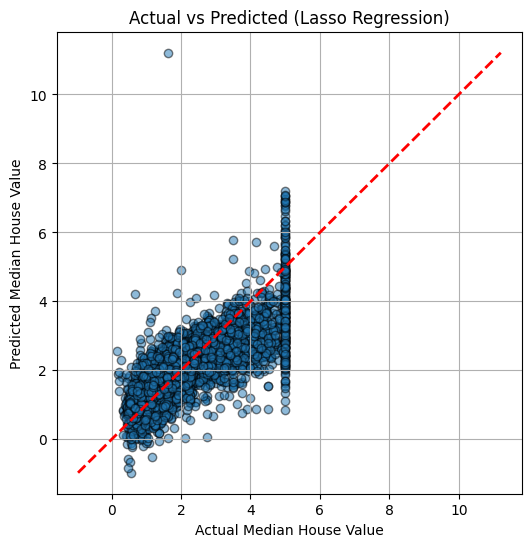

In [40]:
#Plot the actu
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, edgecolors="k")
min_val = min(y_test.min(), y_pred_lasso.min())
max_val = max(y_test.max(), y_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Lasso Regression)")
plt.grid(True)
plt.show()

In [48]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Linear": lin_coef,
    "Ridge": ridge_coef,
    "Lasso": lasso_coef
})

coef_df

,Feature,Linear,Ridge,Lasso
0,MedInc,0.849222,0.849222,0.843904
1,HouseAge,0.122119,0.122119,0.122809
2,AveRooms,-0.299558,-0.299558,-0.285848
3,AveBedrms,0.348410,0.348409,0.334580
4,Population,-0.000884,-0.000884,-0.000000
5,AveOccup,-0.041698,-0.041698,-0.040719
6,Latitude,-0.893856,-0.893855,-0.883086
7,Longitude,-0.868617,-0.868616,-0.857151


The dataset contains three dominant predictors that display almost linear relationships with the target variable: median income (strong positive effect), latitude, and longitude (strong negative effects).
These variables capture the main linear structure of the problem, explaining most of the predictive power of the linear models and why Linear Regression, Ridge, and Lasso produce very similar results.

In Ridge Regression, increasing the regularization parameter α results in a uniform shrinkage of all coefficients towards, but not actual to, 0. Ridge reduces the magnitude of coefficients but keeps all features in the model.

In Lasso Regression, α has a stronger effect. As α increases, Lasso can force some coefficients exactly to zero, effectively removing features that contribute little to prediction. In our case, because the selected α is very small, the impact is limited. However, we observe that the Population feature is pushed to 0 by Lasso, meaning it is considered unimportant

  PROBLEM 2

In [49]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [51]:
# Load the dataset
data = fetch_openml("banknote-authentication", as_frame=True)
df = data.frame

In [55]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')


In [57]:
X = df[['V1', 'V3']]
y = df['Class']

In [58]:
import numpy as np

In [61]:
# Number of samples in each class
class_counts = y.value_counts()
class_counts

,count
Class,
1,762
2,610


In [62]:
# compute descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
V2,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
V3,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
V4,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495


In [64]:
# correlation between V1 (Variance) and V3 (Curtosis)
correlation = X.corr().loc['V1', 'V3']
correlation

np.float64(-0.3808499719222592)

In [66]:
# check for missing values
missing_values = df.isna().sum()
missing_values

,0
V1,0
V2,0
V3,0
V4,0
Class,0


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

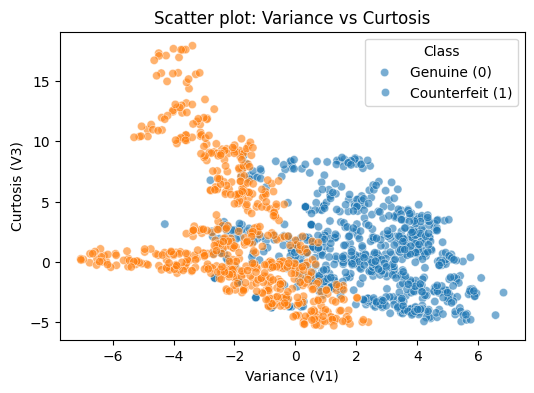

In [68]:
# Scatter plot: Variance vs Curtosis
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="V1",
    y="V3",
    hue="Class",
    alpha=0.6
)
plt.title("Scatter plot: Variance vs Curtosis")
plt.xlabel("Variance (V1)")
plt.ylabel("Curtosis (V3)")
plt.legend(title="Class", labels=["Genuine (0)", "Counterfeit (1)"])
plt.show()

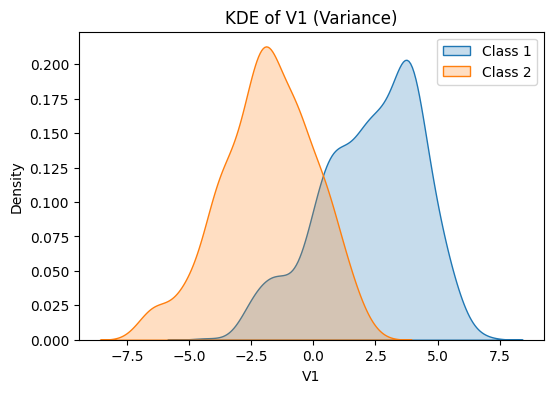

In [82]:
#Plot KDE of V1
plt.figure(figsize=(6,4))
sns.kdeplot(df[df["Class"] == 1]["V1"], label="Class 1", fill=True)
sns.kdeplot(df[df["Class"] == 2]["V1"], label="Class 2", fill=True)
plt.title("KDE of V1 (Variance)")
plt.xlabel("V1")
plt.legend()
plt.show()

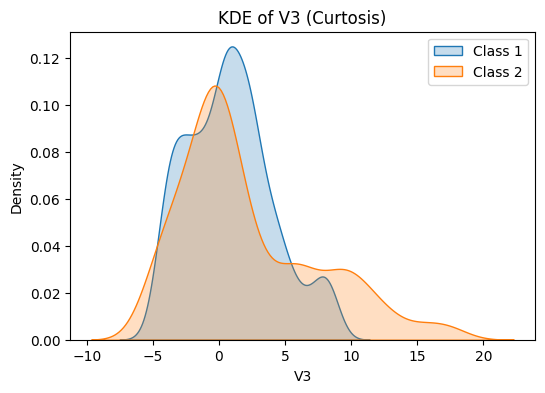

In [83]:
#Plot KDE of V3
plt.figure(figsize=(6,4))
sns.kdeplot(df[df["Class"] == 1]["V3"], label="Class 1", fill=True)
sns.kdeplot(df[df["Class"] == 2]["V3"], label="Class 2", fill=True)
plt.title("KDE of V3 (Curtosis)")
plt.xlabel("V3")
plt.legend()
plt.show()

The scatter plot of Variance (V1) vs Curtosis (V3) shows that the two classes form partially distinct clusters but with a significant overlapping region (from -2 to 2).
KDE for V1, shows the class distributions are shifted, but the densities overlap in the range around 0 - 2
KDE for V3 shows the distributions overlap even more heavily, indicating no single threshold can perfectly separate the classes.
As a conclusion these plots suggest that the classes are not linearly separable. A linear classifier would not be able to find a single straight boundary with low classification error. So we should look into a non-linear model, such as an SVM with an RBF kernel, which can model curved decision boundaries and better capture the structure of the data.

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [85]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
#Linear SVM with C = 0.01
svm_c001 = SVC(kernel="linear", C=0.01)
svm_c001.fit(X_scaled, y)

SVC(C=0.01, kernel='linear')

In [88]:
y_pred_c001 = svm_c001.predict(X_scaled)
f1_c001 = f1_score(y, y_pred_c001, average="binary", pos_label=2)

ValueError: pos_label=2 is not a valid label. It should be one of ['1', '2']

this error should mean that my y labels are strings, not integers. So I need to convert them to integers to calculate the f1 score

In [89]:
df["Class"] = df["Class"].astype(int)
y = df["Class"]

In [90]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Linear SVM with C = 0.01
svm_c001 = SVC(kernel="linear", C=0.01)
svm_c001.fit(X_scaled, y)

SVC(C=0.01, kernel='linear')

In [93]:
y_pred_c001 = svm_c001.predict(X_scaled)
f1_c001 = f1_score(y, y_pred_c001, average="binary", pos_label=2)
f1_c001

0.864313725490196

In [94]:
sv_count_c001 = svm_c001.n_support_
sv_count_c001

array([348, 348], dtype=int32)

In [95]:
# Linear SVM with C = 1000
svm_c1000 = SVC(kernel="linear", C=1000)
svm_c1000.fit(X_scaled, y)

SVC(C=1000, kernel='linear')

In [96]:
y_pred_c1000 = svm_c1000.predict(X_scaled)
f1_c1000 = f1_score(y, y_pred_c1000, average="binary", pos_label=2)
f1_c1000

0.8722741433021807

In [97]:
sv_count_c1000 = svm_c1000.n_support_
sv_count_c1000

array([223, 223], dtype=int32)

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def plot_svc_decision_boundary(clf, X, y, title):
    # extract coordinates
    x1 = X[:, 0]
    x2 = X[:, 1]

    plt.figure(figsize=(6,4))

    # 1) plot data
    plt.scatter(x1[y==1], x2[y==1], alpha=0.6, label="Class 1")
    plt.scatter(x1[y==2], x2[y==2], alpha=0.6, label="Class 2")

    # 2) meshgrid for decision_function
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),np.linspace(x2_min, x2_max, 200))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 3) decision boundary & margins
    plt.contour(xx, yy, Z, levels=[0], colors='k')
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='k', linestyles='--')

    # 4) support vectors
    sv = clf.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1],s=120, facecolors='none', edgecolors='red', label="Support Vectors")

    plt.title(title)
    plt.xlabel("Standardized V1")
    plt.ylabel("Standardized V3")
    plt.legend()
    plt.tight_layout()
    plt.show()

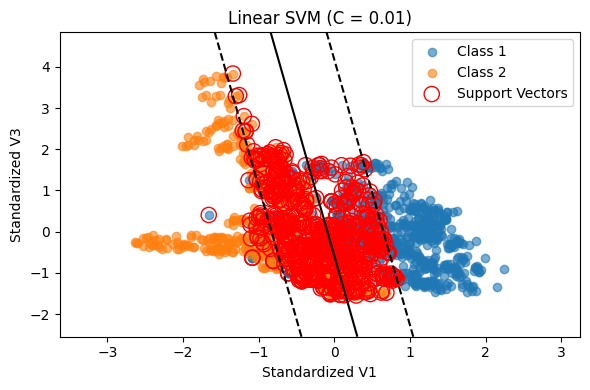

In [110]:
plot_svc_decision_boundary(svm_c001,  X_scaled, y, "Linear SVM (C = 0.01)")

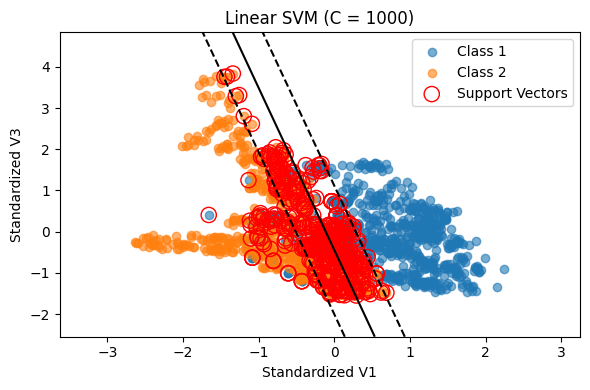

In [111]:
plot_svc_decision_boundary(clf=svm_c1000,  X=X_scaled, y=y, title="Linear SVM (C = 1000)")

We notice that low C (0.01) leads to wider margins. this then leads to many SVs (696). This may result to underfitting as the model tolerates misclassified points, and the f1 score is lower

High C (1000) leads to narroer margins, which leads to fewer SVs (446). This may result to overfitting as the model tries to fit the data almost perfectly